In [7]:
# code here
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

1) Aplique nas imagens abaixo o algortimo Watershed para realizar a contagem de células. Faça tanto para  a imagem original e para a imagem gradiente

In [8]:

def watershed(img):
    trhesh, img_bin = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

    kernel = np.ones((3,3),np.uint8)
    abertura = cv.morphologyEx(img_bin, cv.MORPH_OPEN, kernel, iterations=2)

    back_ground = cv.dilate(abertura, kernel, iterations=2)

    dist_transform = cv.distanceTransform(abertura, cv.DIST_L2, 5)
    trhesh, fore_ground = cv.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    fore_ground = np.uint8(fore_ground)

    areas_desconhecidas = cv.subtract(back_ground, fore_ground)

    qtd_objetos, markers = cv.connectedComponents(fore_ground)

    markers = markers + 1

    markers[areas_desconhecidas == 255] = 0

    markers = cv.watershed(cv.cvtColor(img, cv.COLOR_GRAY2BGR), markers)

    img_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
    img_color[markers == -1] = [255, 0, 0]

    
    plt.imshow(img_color)
    plt.title('Segmentação com Watershed')
    plt.axis('off')
    plt.show()

    return qtd_objetos, img_color

def sobel(image):
    sobelx = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=3)  
    sobely = cv.Sobel(image, cv.CV_64F, 0, 1, ksize=3)  
    sobel = cv.magnitude(sobelx, sobely)  

    sobel = np.uint8(255 * sobel / np.max(sobel))

    plt.imshow(sobel, cmap='gray')
    plt.title('Imagem com Sobel')
    plt.axis('off')
    plt.show()

    return sobel


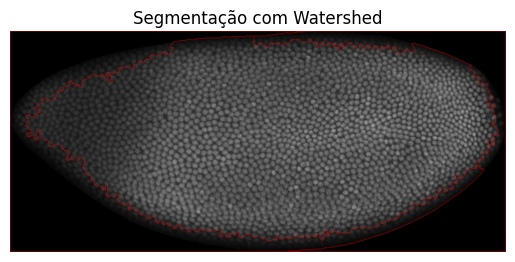

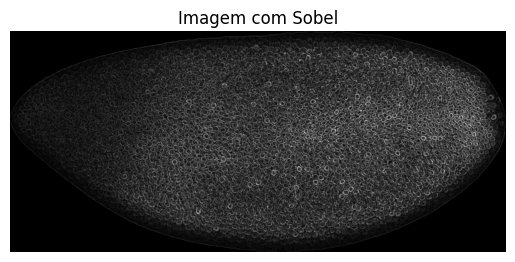

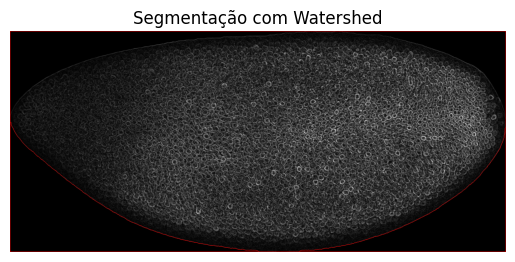

In [9]:
img1 = cv.imread("image.jpg", cv.IMREAD_GRAYSCALE)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

ret, segmented_image = watershed(img1)


sobel_image = sobel(img1)
ret2, segmented_image2 = watershed(sobel_image)

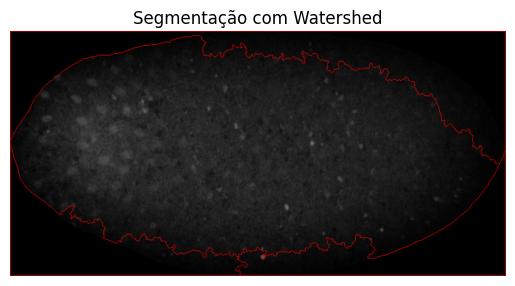

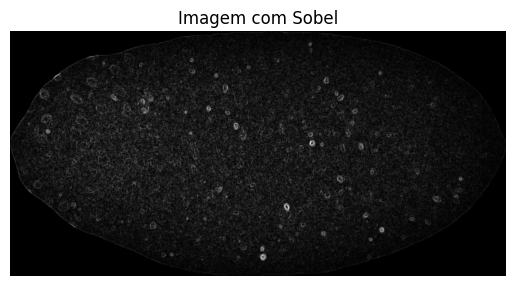

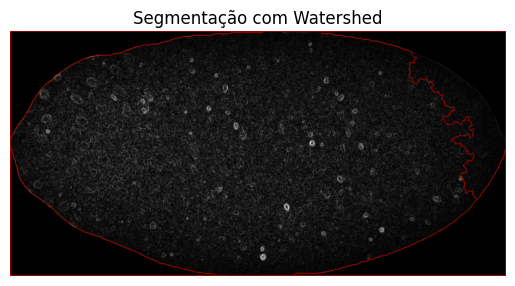

In [10]:
img2 = cv.imread("image2.jpg", cv.IMREAD_GRAYSCALE)

plt.imshow(img2, cmap='gray', vmin=0, vmax=255);

ret, segmented_image = watershed(img2)

sobel_image = sobel(img2)
ret2, segmented_image2 = watershed(sobel_image)


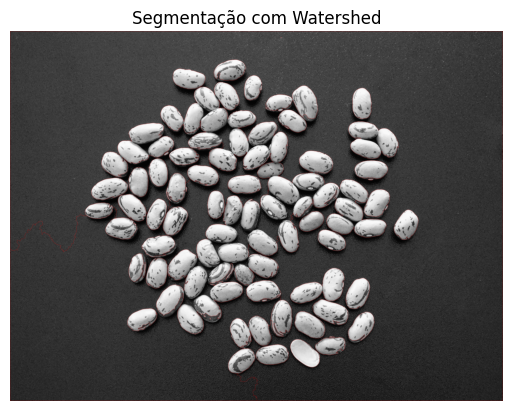

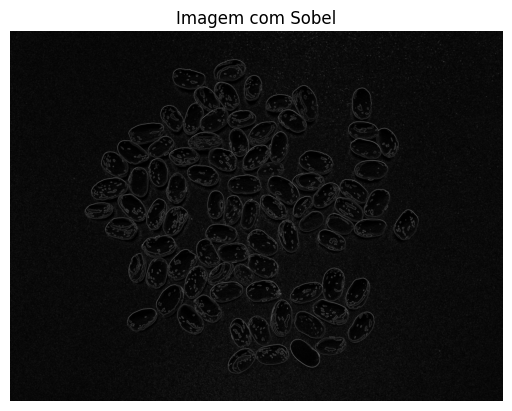

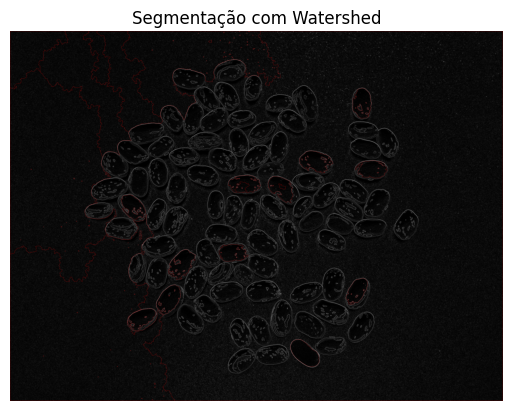

In [11]:
img3 = cv.imread("feijao.jpg", cv.IMREAD_GRAYSCALE)

plt.imshow(img3, cmap='gray', vmin=0, vmax=255)

ret, segmented_image = watershed(img3)

sobel_image = sobel(img3)
ret2, segmented_image2 = watershed(sobel_image)
